<a href="https://colab.research.google.com/github/paras120592/easyconnect/blob/master/Micd_data_XGboost_with_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print(imblearn.__version__)

0.4.3


In [4]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data.csv to cleaned_data.csv


In [11]:
import pandas as pd
import numpy as np
data = pd.read_csv("cleaned_data.csv")

In [12]:
data.head()

,Unnamed: 0,click_date,platform,customer_city,customer_state,urban_flag,credit_card_on_file,student,fav_genre,subscriber
0,0,2017-12-27,mobile web,san antonio,Texas,1,0,0,hip_hop,True
1,1,2018-01-10,mobile web,honolulu,Hawaii,0,0,0,hip_hop,False
2,2,2017-12-15,desktop web,atlanta,Georgia,1,0,0,hip_hop,True
3,3,2018-01-06,mobile web,honolulu,Hawaii,0,0,0,hip_hop,False
4,4,2017-12-20,mobile web,miami,Florida,0,0,0,indie_rock,False


In [ ]:
df = data.copy()
df['click_date'] = pd.to_datetime(df['click_date'])
df['click_day_of_week'] =  df.click_date.dt.day_name()
df.drop('click_date', axis=1, inplace=True)
df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df['fav_genre_hip_hop'] = np.where(df.fav_genre.isin(['hip_hop']),1,0)
df['fav_genre_not_defined'] = np.where(df.fav_genre.isin(['not_defined']),1,0)
df['fav_platform_mobile'] = np.where(df.platform.isin(['mobile web']),1,0)
df['fav_genre_desktop'] = np.where(df.fav_genre.isin(['not_defined']),1,0)

X = df.drop(['Unnamed: 0','subscriber','customer_city','click_day_of_week','customer_state','platform','fav_genre'], axis=1)
y = df['subscriber'].astype(int)

In [ ]:
X.head()

,urban_flag,credit_card_on_file,student,state_flag,fav_genre_hip_hop,fav_genre_not_defined,fav_platform_mobile,fav_genre_desktop
0,1,0,0,1,1,0,1,0
1,0,0,0,1,1,0,1,0
2,1,0,0,1,1,0,0,0
3,0,0,0,1,1,0,1,0
4,0,0,0,1,0,0,1,0


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: subscriber, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model = XGBClassifier()
weights = [8,9,10,11,12]
param_grid = dict(scale_pos_weight=weights)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='f1_macro')
# execute the grid search
grid_result = grid.fit(X, y)


# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.520123 using {'scale_pos_weight': 10}
0.510942 (0.006636) with: {'scale_pos_weight': 8}
0.514179 (0.007092) with: {'scale_pos_weight': 9}
0.520123 (0.005782) with: {'scale_pos_weight': 10}
0.506570 (0.006207) with: {'scale_pos_weight': 11}
0.466600 (0.018206) with: {'scale_pos_weight': 12}


In [ ]:
x_model = grid.best_estimator_
y_pred = x_model.predict(X)
print(len(y_pred[y_pred==1]))
print(len(y_pred[y_pred==0]))

7752
86442


In [ ]:
x_card = X[X.credit_card_on_file == 1]

In [ ]:
y_card = y[X.credit_card_on_file == 1]

In [ ]:
y_card.shape

(2035,)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model = XGBClassifier()
weights = [5]
param_grid = dict(scale_pos_weight=weights)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='f1_macro')
# execute the grid search
grid_result = grid.fit(x_card, y_card)


# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.525815 using {'scale_pos_weight': 5}
0.525815 (0.020664) with: {'scale_pos_weight': 5}


In [ ]:
x_model = grid.best_estimator_
y_pred = x_model.predict(x_card)
print(len(y_pred[y_pred==1]))
print(len(y_pred[y_pred==0]))

423
1612


In [ ]:
sum(y_card[y_pred==1]==1)

73

In [ ]:
sum(y_card[y_pred==1]==0)

350

In [ ]:
# Implement SMOTE with XGBoost

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,)

In [ ]:
X.head()

,urban_flag,credit_card_on_file,student,state_flag,fav_genre_hip_hop,fav_genre_not_defined,fav_platform_mobile,fav_genre_desktop
0,1,0,0,1,1,0,1,0
1,0,0,0,1,1,0,1,0
2,1,0,0,1,1,0,0,0
3,0,0,0,1,1,0,1,0
4,0,0,0,1,0,0,1,0


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: subscriber, dtype: int64

In [ ]:
X.shape

(94194, 8)

In [ ]:
y.shape

(94194,)

In [ ]:
X_res, y_res = smote.fit_sample(X, y,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.25, random_state = 42)


In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
len(y_pred[y_pred==1]==1)

22346

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def plot_cm(classifier, predictions):
    cm = confusion_matrix(y_test, predictions)
    
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap='RdBu')
    classNames = ['Normal','Fraud']
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    
    plt.show()
        
    tn, fp, fn, tp = cm.ravel()

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    F1 = 2*recall*precision/(recall+precision)

    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))

from sklearn.metrics import average_precision_score, precision_recall_curve
def plot_aucprc(classifier, scores):
    precision, recall, _ = precision_recall_curve(y_test, scores, pos_label=0)
    average_precision = average_precision_score(y_test, scores)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()

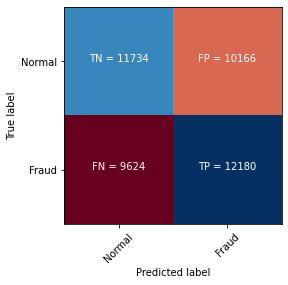

Recall=0.559 
Precision=0.545
F1=0.552
Average precision-recall score: 0.555


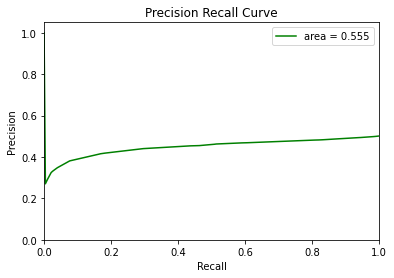

In [ ]:
try:
    scores = xgb.decision_function(X_test)
except:
    scores = xgb.predict_proba(X_test)[:,1]
#Make plots
y_pred = xgb.predict(X_test)
plot_cm(xgb, y_pred)
plot_aucprc(xgb, scores)


In [ ]:
# no good - it captures half 1s and half of predictions are wrong

In [ ]:
# Using Machinelearning Mastery tutorial for using SMOTE 

In [ ]:
df = data.copy()
df['click_date'] = pd.to_datetime(df['click_date'])
df['click_day_of_week'] =  df.click_date.dt.day_name()
df.drop('click_date', axis=1, inplace=True)
df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df['fav_genre_hip_hop'] = np.where(df.fav_genre.isin(['hip_hop']),1,0)
df['fav_genre_not_defined'] = np.where(df.fav_genre.isin(['not_defined']),1,0)
df['fav_platform_mobile'] = np.where(df.platform.isin(['mobile web']),1,0)
df['fav_genre_desktop'] = np.where(df.fav_genre.isin(['not_defined']),1,0)

X = df.drop(['Unnamed: 0','subscriber','customer_city','click_day_of_week','customer_state','platform','fav_genre'], axis=1)
y = df['subscriber'].astype(int)

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
# 	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = DecisionTreeClassifier()
	over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.560
> k=2, Mean ROC AUC: 0.561
> k=3, Mean ROC AUC: 0.560
> k=4, Mean ROC AUC: 0.560
> k=5, Mean ROC AUC: 0.560
> k=6, Mean ROC AUC: 0.561
> k=7, Mean ROC AUC: 0.561


In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
# 	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = DecisionTreeClassifier()
	over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.560
> k=2, Mean ROC AUC: 0.561
> k=3, Mean ROC AUC: 0.561
> k=4, Mean ROC AUC: 0.561
> k=5, Mean ROC AUC: 0.560
> k=6, Mean ROC AUC: 0.561
> k=7, Mean ROC AUC: 0.560


In [ ]:
# over sampling with 0.5 also doesnt make a change

In [ ]:
# using XGboost with SMOTE

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
# 	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# values to evaluate
k_values = [1, 2, 3, 4, 5, 6, 7]
for k in k_values:
	# define pipeline
	model = XGBClassifier()
	over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X.values, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.561
> k=2, Mean ROC AUC: 0.561
> k=3, Mean ROC AUC: 0.561
> k=4, Mean ROC AUC: 0.560
> k=5, Mean ROC AUC: 0.561
> k=6, Mean ROC AUC: 0.561
> k=7, Mean ROC AUC: 0.560


In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
# 	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# values to evaluate
k_values = [1]
for k in k_values:
	# define pipeline
	model = XGBClassifier()
	over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X.values, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.562


In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
# 	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# values to evaluate
k_values = [1, 3, 5]
for k in k_values:
	# define pipeline
	model = XGBClassifier()
	over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X.values, y, scoring='f1_macro', cv=cv, n_jobs=-1)
	score = mean(scores)
	print('> k=%d, Mean f1_macro: %.3f' % (k, score))

> k=1, Mean f1_macro: 0.493
> k=3, Mean f1_macro: 0.494
> k=5, Mean f1_macro: 0.493


In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
# 	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# values to evaluate
k_values = [3]
for k in k_values:
	# define pipeline
	model = XGBClassifier()
	over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X.values, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = mean(scores)
	print('> k=%d, Mean roc_auc: %.3f' % (k, score))

> k=3, Mean roc_auc: 0.561


In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
# 	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# values to evaluate
k_values = [3]
for k in k_values:
	# define pipeline
	model = XGBClassifier()
	over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over),('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X.values, y, scoring='f1_macro', cv=cv, n_jobs=-1)
	score = mean(scores)
	print('> k=%d, Mean f1_macro: %.3f' % (k, score))

> k=3, Mean f1_macro: 0.491


In [ ]:
X.head() 

,urban_flag,credit_card_on_file,student,state_flag,fav_genre_hip_hop,fav_genre_not_defined,fav_platform_mobile,fav_genre_desktop
0,1,0,0,1,1,0,1,0
1,0,0,0,1,1,0,1,0
2,1,0,0,1,1,0,0,0
3,0,0,0,1,1,0,1,0
4,0,0,0,1,0,0,1,0


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: subscriber, dtype: int64

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
# 	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# values to evaluate
k_values = [1, 3, 5]
for k in k_values:
	# define pipeline
	model = RandomForestClassifier()
	over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=1, Mean ROC AUC: 0.561
> k=3, Mean ROC AUC: 0.561
> k=5, Mean ROC AUC: 0.560


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
MLP = MLPClassifier()

In [ ]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# define dataset
# X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
# 	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# values to evaluate
k_values = [ 3]
for k in k_values:
	# define pipeline
	model = MLPClassifier()
	over = SMOTE(sampling_strategy=0.5, k_neighbors=k)
	under = RandomUnderSampler(sampling_strategy=0.5)
	steps = [('over', over), ('under', under), ('model', model)]
	pipeline = Pipeline(steps=steps)
	# evaluate pipeline
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
	score = mean(scores)
	print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

> k=3, Mean ROC AUC: 0.560


In [ ]:
X.head()

,urban_flag,credit_card_on_file,student,state_flag,fav_genre_hip_hop,fav_genre_not_defined,fav_platform_mobile,fav_genre_desktop
0,1,0,0,1,1,0,1,0
1,0,0,0,1,1,0,1,0
2,1,0,0,1,1,0,0,0
3,0,0,0,1,1,0,1,0
4,0,0,0,1,0,0,1,0


In [ ]:
y.shape

(94194,)

In [ ]:
from sklearn import svm

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [ ]:
X_train.shape

(75355, 8)

In [ ]:
clf = svm.SVC()

In [ ]:
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_pred[y_pred==1]

array([], dtype=int64)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score , f1_score , confusion_matrix, classification_report

In [ ]:
df = data.copy()
df['click_date'] = pd.to_datetime(df['click_date'])
df['click_day_of_week'] =  df.click_date.dt.day_name()
df.drop('click_date', axis=1, inplace=True)
df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df['fav_genre_hip_hop'] = np.where(df.fav_genre.isin(['hip_hop']),1,0)
df['fav_genre_not_defined'] = np.where(df.fav_genre.isin(['not_defined']),1,0)
df['fav_platform_mobile'] = np.where(df.platform.isin(['mobile web']),1,0)
df['fav_genre_desktop'] = np.where(df.fav_genre.isin(['not_defined']),1,0)

X = df.drop(['Unnamed: 0','subscriber','customer_city','click_day_of_week','customer_state','platform','fav_genre'], axis=1)
y = df['subscriber'].astype(int)

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=42).fit(X_train, Y_train)
#Y_pred = clf.predict(X_test)
Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.115).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 417
Predicted 0's 18422
F1 score: 0.06329113924050633
roc_auc: 0.5382284634409561
confusion matrix: [[17156   362]
 [ 1266    55]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     17518
           1       0.13      0.04      0.06      1321

    accuracy                           0.91     18839
   macro avg       0.53      0.51      0.51     18839
weighted avg       0.88      0.91      0.89     18839



In [ ]:
df = data.copy()
#df['click_date'] = pd.to_datetime(df['click_date'])
#df['click_day_of_week'] =  df.click_date.dt.day_name()
df.drop(['click_date','Unnamed: 0'], axis=1, inplace=True)
df=pd.get_dummies(df, columns=["platform","fav_genre","customer_state","customer_city"])
# creating a new instance df with all manipulations on top of clean data

In [ ]:
X = df.drop('subscriber', axis=1)
Y = df['subscriber'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
clf = LogisticRegression(random_state=42,max_iter=1000).fit(X_train, Y_train)
#Y_pred = clf.predict(X_test)
Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.115).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 1464
Predicted 0's 17375
F1 score: 0.1156193895870736
roc_auc: 0.6229821447199243
confusion matrix: [[16215  1303]
 [ 1160   161]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     17518
           1       0.11      0.12      0.12      1321

    accuracy                           0.87     18839
   macro avg       0.52      0.52      0.52     18839
weighted avg       0.88      0.87      0.87     18839



In [ ]:
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight='balanced').fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.115).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 9351
Predicted 0's 9488
F1 score: 0.16266866566716642
roc_auc: 0.6170179105924919
confusion matrix: [[9035 8483]
 [ 453  868]]
              precision    recall  f1-score   support

           0       0.95      0.52      0.67     17518
           1       0.09      0.66      0.16      1321

    accuracy                           0.53     18839
   macro avg       0.52      0.59      0.42     18839
weighted avg       0.89      0.53      0.63     18839



In [ ]:
len(y_test[y_test==1])

1370

In [ ]:
# ^ Out of 1370 1's our model is able to predict 868 1's 
# Our case can be that we want more recall model like we want to predict 1 for a user if he is likelt to be a subscriber; 
# having a false positive is not that costly but we want low false negatives

In [ ]:
weights = {0:7.0, 1:93.0}

In [ ]:
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.115).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 10210
Predicted 0's 8629
F1 score: 0.15852918220449225
roc_auc: 0.6136878870734797
confusion matrix: [[8222 9296]
 [ 407  914]]
              precision    recall  f1-score   support

           0       0.95      0.47      0.63     17518
           1       0.09      0.69      0.16      1321

    accuracy                           0.48     18839
   macro avg       0.52      0.58      0.39     18839
weighted avg       0.89      0.48      0.60     18839



In [ ]:
# using class_weights = weights improves recall, we can try other iterations for weights dict

In [ ]:
weights = {0:1.0, 1:100.0}

In [ ]:
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.115).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 18407
Predicted 0's 432
F1 score: 0.13118410381184104
roc_auc: 0.6138431939670748
confusion matrix: [[  405 17113]
 [   27  1294]]
              precision    recall  f1-score   support

           0       0.94      0.02      0.05     17518
           1       0.07      0.98      0.13      1321

    accuracy                           0.09     18839
   macro avg       0.50      0.50      0.09     18839
weighted avg       0.88      0.09      0.05     18839



In [ ]:
weights = {0:7.0, 1:100.0}

In [ ]:
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights).fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.7).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 11546
Predicted 0's 7293
F1 score: 0.15450376933240073
roc_auc: 0.6135858615932965
confusion matrix: [[ 6966 10552]
 [  327   994]]
              precision    recall  f1-score   support

           0       0.96      0.40      0.56     17518
           1       0.09      0.75      0.15      1321

    accuracy                           0.42     18839
   macro avg       0.52      0.58      0.36     18839
weighted avg       0.89      0.42      0.53     18839



In [ ]:
weights = {0:7.0, 1:93.0}

In [ ]:
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.7).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 10210
Predicted 0's 8629
F1 score: 0.15852918220449225
roc_auc: 0.6136878870734797
confusion matrix: [[8222 9296]
 [ 407  914]]
              precision    recall  f1-score   support

           0       0.95      0.47      0.63     17518
           1       0.09      0.69      0.16      1321

    accuracy                           0.48     18839
   macro avg       0.52      0.58      0.39     18839
weighted avg       0.89      0.48      0.60     18839



Best parameters : {'class_weight': {0: 0.09736842105263158, 1: 0.9026315789473685}}


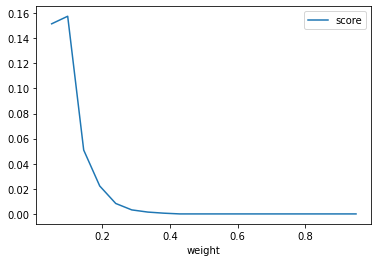

In [ ]:
from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05, 0.95, 20)

gsc = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X, y)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs f1 score
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')


In [ ]:
weights = {0: 0.09736842105263158, 1: 0.9026315789473685}

In [ ]:
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.7).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 2990
Predicted 0's 15849
F1 score: 0.15541637671073996
roc_auc: 0.6241075795381742
confusion matrix: [[14863  2655]
 [  986   335]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89     17518
           1       0.11      0.25      0.16      1321

    accuracy                           0.81     18839
   macro avg       0.52      0.55      0.52     18839
weighted avg       0.88      0.81      0.84     18839



In [ ]:
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
#Y_pred = clf.predict(X_test)
Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.4).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 11284
Predicted 0's 7555
F1 score: 0.15676318921063068
roc_auc: 0.6241075795381742
confusion matrix: [[ 7222 10296]
 [  333   988]]
              precision    recall  f1-score   support

           0       0.96      0.41      0.58     17518
           1       0.09      0.75      0.16      1321

    accuracy                           0.44     18839
   macro avg       0.52      0.58      0.37     18839
weighted avg       0.90      0.44      0.55     18839



In [ ]:
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 2990
Predicted 0's 15849
F1 score: 0.15541637671073996
roc_auc: 0.6241075795381742
confusion matrix: [[14863  2655]
 [  986   335]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89     17518
           1       0.11      0.25      0.16      1321

    accuracy                           0.81     18839
   macro avg       0.52      0.55      0.52     18839
weighted avg       0.88      0.81      0.84     18839



In [ ]:
# trying to maximize recall with gridsearch because maximizing f1 doesn't seem to be the objective because in doing that we are trying to optimize precision and recall which doesnt seem to be the objective

Best parameters : {'class_weight': {0: 0.05, 1: 0.95}}


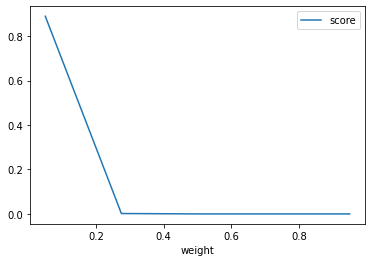

In [ ]:
from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05, 0.95, 5)

gsc = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='recall',
    cv=3
)
grid_result = gsc.fit(X, y)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs recall
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')


In [ ]:
weights = {0: 0.05, 1: 0.95}

In [ ]:
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 14494
Predicted 0's 4345
F1 score: 0.14871957002845398
roc_auc: 0.6250425754359807
confusion matrix: [[ 4200 13318]
 [  145  1176]]
              precision    recall  f1-score   support

           0       0.97      0.24      0.38     17518
           1       0.08      0.89      0.15      1321

    accuracy                           0.29     18839
   macro avg       0.52      0.56      0.27     18839
weighted avg       0.90      0.29      0.37     18839



Best parameters : {'class_weight': {0: 0.05, 1: 0.95}}


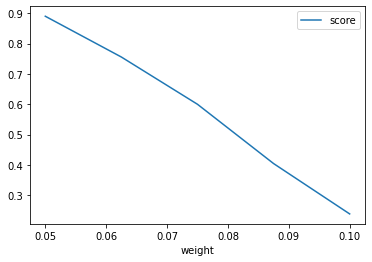

In [ ]:
from sklearn.model_selection import GridSearchCV

weights = np.linspace(0.05, 0.1, 5)

gsc = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='recall',
    cv=3
)
grid_result = gsc.fit(X, y)

print("Best parameters : %s" % grid_result.best_params_)

# Plot the weights vs recall
dataz = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
dataz.plot(x='weight')


In [ ]:
weights = {0: 0.07, 1: 0.93}

In [ ]:
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 10206
Predicted 0's 8633
F1 score: 0.16101327318469683
roc_auc: 0.6243892839453378
confusion matrix: [[8240 9278]
 [ 393  928]]
              precision    recall  f1-score   support

           0       0.95      0.47      0.63     17518
           1       0.09      0.70      0.16      1321

    accuracy                           0.49     18839
   macro avg       0.52      0.59      0.40     18839
weighted avg       0.89      0.49      0.60     18839



In [ ]:
#use gridsearch cv to maximize recall

In [ ]:
X_test.shape

(18839, 857)

In [ ]:
Y_pred.shape

(18839,)

In [ ]:
d_ks = X_test

In [ ]:
d_ks = X_test
y_prob = clf.predict_proba(X_test)[:,1] 
d_ks['prob'] = y_prob
d_ks['y'] = y_test
d_ks['target0'] = 1 - d_ks['y']
d_ks['bucket'] = pd.qcut(d_ks['prob'], 10)

In [ ]:
d_ks['prob'] = y_prob

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
d_ks['y'] = y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
  d_ks['target0'] = 1 - d_ks['y']
  d_ks['bucket'] = pd.qcut(d_ks['prob'], 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    #from colorama import Fore
    print( "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)
  

In [ ]:
ks = ks(data=d_ks  ,target="y", prob="prob")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.611853  0.865375    45.0      315.0     15.85%         8.91%   
2       0.577495  0.611818    35.0      314.0     12.32%         8.89%   
3       0.563585  0.577079    41.0      365.0     14.44%        10.33%   
4       0.537916  0.563530    32.0      339.0     11.27%         9.59%   
5       0.509031  0.537866    28.0      356.0      9.86%        10.07%   
6       0.488633  0.509001    18.0      391.0      6.34%        11.06%   
7       0.441981  0.488502    35.0      362.0     12.32%        10.24%   
8       0.401169  0.441919    17.0      312.0      5.99%         8.83%   
9       0.272915  0.400878    21.0      404.0      7.39%        11.43%   
10      0.108472  0.272786    12.0      376.0      4.23%        10.64%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             15.85

In [17]:
!pip install scikitplot

ERROR: Could not find a version that satisfies the requirement scikitplot (from versions: none)
ERROR: No matching distribution found for scikitplot


In [16]:
import kds

ModuleNotFoundError: ignored

In [18]:
!pip install kds

In [23]:
import kds
from kds import metrics

In [22]:
kds.metrics.plot_cumulative_gain(Y_test, y_prob,)

NameError: ignored

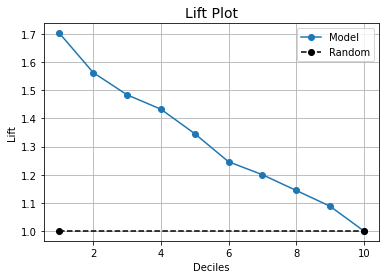

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,...,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.612,0.865,0.653,...,100.0,9.470,7.563,1.703
1,2,0.577,0.612,0.591,...,100.0,19.152,12.112,1.563
2,3,0.564,0.577,0.570,...,100.0,28.907,15.605,1.484
3,4,0.538,0.564,0.550,...,100.0,38.697,18.608,1.433
4,5,0.509,0.538,0.522,...,100.0,48.698,18.600,1.346
5,6,0.489,0.509,0.500,...,100.0,58.888,15.904,1.246
6,7,0.442,0.488,0.471,...,100.0,68.946,15.081,1.200
7,8,0.401,0.442,0.419,...,100.0,79.136,12.386,1.144
8,9,0.273,0.401,0.346,...,100.0,89.405,8.551,1.088
9,10,0.108,0.273,0.194,...,100.0,100.000,0.000,1.000


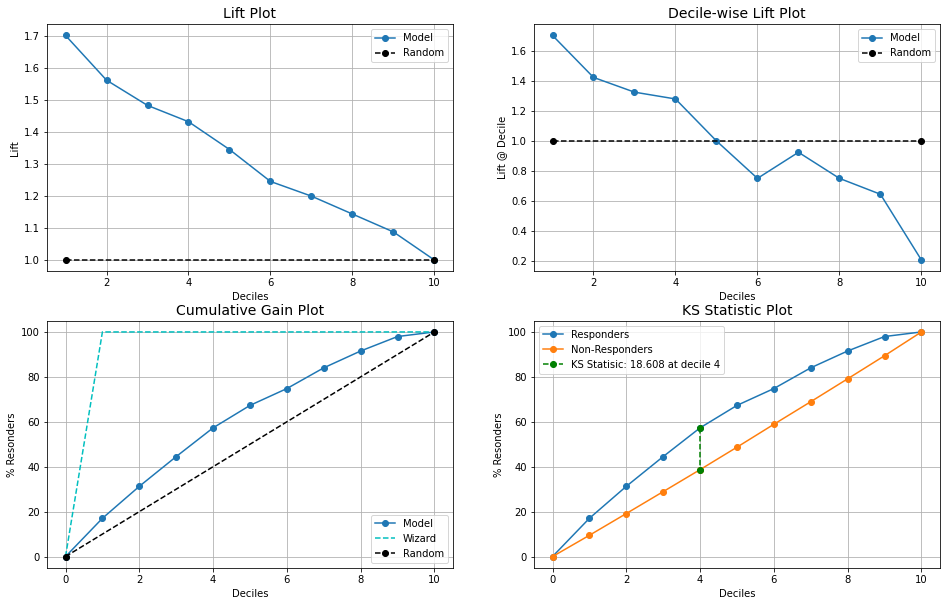

In [ ]:
kds.metrics.report(Y_test, y_prob)

In [ ]:
  # task 1 => drop cities and try 
# task 2 => try maximising recall with XGboost and GridsearchCV

In [ ]:
# Dropping city variable and trying out the model with same params

In [ ]:
df = data.copy()
df.drop(['click_date','Unnamed: 0'], axis=1, inplace=True)
df=pd.get_dummies(df, columns=["platform","fav_genre","customer_state"])
# creating a new instance df with all manipulations on top of clean data
X = df.drop(['subscriber',"customer_city"], axis=1)
Y = df['subscriber'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
weights = {0: 0.07, 1: 0.93}
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 10576
Predicted 0's 8263
F1 score: 0.15566949651172565
roc_auc: 0.6074076375557131
confusion matrix: [[7868 9650]
 [ 395  926]]
              precision    recall  f1-score   support

           0       0.95      0.45      0.61     17518
           1       0.09      0.70      0.16      1321

    accuracy                           0.47     18839
   macro avg       0.52      0.58      0.38     18839
weighted avg       0.89      0.47      0.58     18839



In [ ]:
# Doesn't look like dropping city works well as recall and precision are same for 1s but roc_auc and F1 score have dropped

In [ ]:

df = data.copy()
df.drop(['click_date','Unnamed: 0'], axis=1, inplace=True)
df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df=pd.get_dummies(df, columns=["platform","fav_genre","customer_state","customer_city"])
# creating a new instance df with all manipulations on top of clean data
X = df.drop(['subscriber'], axis=1)
Y = df['subscriber'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
weights = {0: 0.07, 1: 0.93}
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 10200
Predicted 0's 8639
F1 score: 0.1610971269855047
roc_auc: 0.6244528500111359
confusion matrix: [[8246 9272]
 [ 393  928]]
              precision    recall  f1-score   support

           0       0.95      0.47      0.63     17518
           1       0.09      0.70      0.16      1321

    accuracy                           0.49     18839
   macro avg       0.52      0.59      0.40     18839
weighted avg       0.89      0.49      0.60     18839



In [ ]:
# can we break cities into deciles based on the response rate in them


In [9]:
#getting ratio of subscriber/click for each city
df_city = pd.crosstab(data['customer_city'], data['subscriber'])
df_city['ratio_of_subscribers'] = df_city[True]/(df_city[True]+df_city[False])
df_city['total_clicks'] = df_city[True]+df_city[False]
df_city.sort_values('total_clicks', ascending=False, inplace=True)
#return df
df_city['city_rank'] = pd.qcut(df_city['ratio_of_subscribers'], 10,duplicates='drop',labels=False)
df_city.reset_index(inplace=True)

In [ ]:
df = data.copy()
df = df.merge(df_city[['customer_city','city_rank']], how='left', on = 'customer_city')
df.drop(['click_date','Unnamed: 0'], axis=1, inplace=True)
#df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df=pd.get_dummies(df, columns=["platform","fav_genre","customer_state"])
# creating a new instance df with all manipulations on top of clean data
X = df.drop(['subscriber','customer_city'], axis=1)
Y = df['subscriber'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
weights = {0: 0.07, 1: 0.93}
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 9427
Predicted 0's 9412
F1 score: 0.1706363974692966
roc_auc: 0.6441796343313451
confusion matrix: [[9008 8510]
 [ 404  917]]
              precision    recall  f1-score   support

           0       0.96      0.51      0.67     17518
           1       0.10      0.69      0.17      1321

    accuracy                           0.53     18839
   macro avg       0.53      0.60      0.42     18839
weighted avg       0.90      0.53      0.63     18839



In [ ]:
clf.coef_

array([[ 2.04213999e-01,  7.74055547e-01,  1.02281269e-02,
         5.00015440e-01,  1.03155159e-01, -7.21526465e-02,
        -3.74322545e-02,  2.61976082e-02, -2.51718693e-01,
         1.88625648e-01, -3.63927680e-01, -1.91221625e-03,
         2.94320657e-01, -3.65357130e-02, -1.07378619e-01,
         2.45899267e-01,  3.57452108e-01,  9.97987913e-02,
         2.52468409e-01, -9.65381692e-02, -1.32825034e-03,
         9.13471752e-02, -8.47160673e-02,  9.75191585e-02,
         1.56601223e-01,  6.92439823e-02,  8.31736622e-02,
         1.66591840e-01, -3.48845993e-01, -2.08440911e-01,
        -1.69965891e-01,  6.26411597e-02,  6.35037666e-02,
         2.85395057e-02, -6.75515115e-02, -5.40308120e-02,
        -1.18308975e-01,  2.39137025e-01, -5.58700313e-03,
        -1.04695465e-02, -1.90344521e-01, -3.60540778e-01,
        -1.48913716e-01,  4.51955029e-02, -2.03132309e-01,
        -1.19716420e-01, -5.22424079e-02,  4.00525577e-02,
         2.55196588e-01,  2.13934838e-01,  4.50872496e-0

In [ ]:
# looks like our city_rank worked well

# looks like our city_rank worked well

In [16]:
#getting ratio of subscriber/click for each city
df_state = pd.crosstab(data['customer_state'], data['subscriber'])
df_state['ratio_of_subscribers'] = df_state[True]/(df_state[True]+df_state[False])
df_state['total_clicks'] = df_state[True]+df_state[False]
df_state.sort_values('total_clicks', ascending=False, inplace=True)
#return df
df_state['state_rank'] = pd.qcut(df_state['ratio_of_subscribers'], 10,duplicates='drop',labels=False)
df_state.reset_index(inplace=True)

In [ ]:
df_state.state_rank.unique()

array([1, 6, 4, 8, 0, 7, 9, 5, 3, 2])

In [ ]:
df = data.copy()
df = df.merge(df_city[['customer_city','city_rank']], how='left', on = 'customer_city')
df = df.merge(df_state[['customer_state','state_rank']], how='left', on = 'customer_state')
df.drop(['click_date','Unnamed: 0'], axis=1, inplace=True)
#df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df=pd.get_dummies(df, columns=["platform","fav_genre"])
# creating a new instance df with all manipulations on top of clean data
X = df.drop(['subscriber','customer_city',"customer_state"], axis=1)
Y = df['subscriber'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X.columns

Index(['urban_flag', 'credit_card_on_file', 'student', 'city_rank',
       'state_rank', 'platform_desktop web', 'platform_mobile web',
       'platform_undefined platform', 'fav_genre_classical',
       'fav_genre_country', 'fav_genre_hip_hop', 'fav_genre_indie_rock',
       'fav_genre_latin', 'fav_genre_not_defined', 'fav_genre_punk_rock',
       'fav_genre_r&b', 'fav_genre_techno'],
      dtype='object')

In [ ]:
weights = {0: 0.07, 1: 0.93}
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 8300
Predicted 0's 10539
F1 score: 0.1712919654921526
roc_auc: 0.6443371018661976
confusion matrix: [[10042  7476]
 [  497   824]]
              precision    recall  f1-score   support

           0       0.95      0.57      0.72     17518
           1       0.10      0.62      0.17      1321

    accuracy                           0.58     18839
   macro avg       0.53      0.60      0.44     18839
weighted avg       0.89      0.58      0.68     18839



In [ ]:
# adding dummies from state back

In [ ]:
df = data.copy()
df = df.merge(df_city[['customer_city','city_rank']], how='left', on = 'customer_city')
df = df.merge(df_state[['customer_state','state_rank']], how='left', on = 'customer_state')
df.drop(['click_date','Unnamed: 0'], axis=1, inplace=True)
#df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df=pd.get_dummies(df, columns=["platform","fav_genre",'customer_state'])
# creating a new instance df with all manipulations on top of clean data
X = df.drop(['subscriber','customer_city'], axis=1)
Y = df['subscriber'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
weights = {0: 0.07, 1: 0.93}
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 9430
Predicted 0's 9409
F1 score: 0.1705887824388429
roc_auc: 0.6440915665936859
confusion matrix: [[9005 8513]
 [ 404  917]]
              precision    recall  f1-score   support

           0       0.96      0.51      0.67     17518
           1       0.10      0.69      0.17      1321

    accuracy                           0.53     18839
   macro avg       0.53      0.60      0.42     18839
weighted avg       0.90      0.53      0.63     18839



In [ ]:
X.columns

Index(['urban_flag', 'credit_card_on_file', 'student', 'city_rank',
       'state_rank', 'platform_desktop web', 'platform_mobile web',
       'platform_undefined platform', 'fav_genre_classical',
       'fav_genre_country', 'fav_genre_hip_hop', 'fav_genre_indie_rock',
       'fav_genre_latin', 'fav_genre_not_defined', 'fav_genre_punk_rock',
       'fav_genre_r&b', 'fav_genre_techno', 'customer_state_Alabama',
       'customer_state_Alaska', 'customer_state_Arizona',
       'customer_state_Arkansas', 'customer_state_California',
       'customer_state_Colorado', 'customer_state_Connecticut',
       'customer_state_Delaware', 'customer_state_Distict of Columbia',
       'customer_state_Florida', 'customer_state_Georgia',
       'customer_state_Hawaii', 'customer_state_Idaho',
       'customer_state_Illinois', 'customer_state_Indiana',
       'customer_state_Iowa', 'customer_state_Kansas',
       'customer_state_Kentucky', 'customer_state_Louisiana',
       'customer_state_Maine', 'custo

In [ ]:
df = data.copy()
df = df.merge(df_city[['customer_city','city_rank']], how='left', on = 'customer_city')
#df = df.merge(df_state[['customer_state','state_rank']], how='left', on = 'customer_state')
df.drop(['click_date','Unnamed: 0'], axis=1, inplace=True)
#df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df=pd.get_dummies(df, columns=["platform","fav_genre",'customer_state'])
# creating a new instance df with all manipulations on top of clean data
X = df.drop(['subscriber','customer_city'], axis=1)
Y = df['subscriber'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
weights = {0: 0.07, 1: 0.93}
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 9427
Predicted 0's 9412
F1 score: 0.1706363974692966
roc_auc: 0.6441796343313451
confusion matrix: [[9008 8510]
 [ 404  917]]
              precision    recall  f1-score   support

           0       0.96      0.51      0.67     17518
           1       0.10      0.69      0.17      1321

    accuracy                           0.53     18839
   macro avg       0.53      0.60      0.42     18839
weighted avg       0.90      0.53      0.63     18839



In [ ]:
# this is our best logistic model with City_rank flag and dummies for states

In [ ]:
# adding both rank_flags and dummies for city and state

In [19]:
df = data.copy()
df = df.merge(df_city[['customer_city','city_rank']], how='left', on = 'customer_city')
df = df.merge(df_state[['customer_state','state_rank']], how='left', on = 'customer_state')
df.drop(['click_date','Unnamed: 0'], axis=1, inplace=True)
df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df=pd.get_dummies(df, columns=["platform","fav_genre",'customer_state','customer_city'])
X = df.drop(['subscriber'], axis=1)
Y = df['subscriber'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
weights = {0: 0.07, 1: 0.93}
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
y_prob = clf.predict_proba(X_test)[:,1]
kds.metrics.report(Y_test, y_prob)

Predicted 1's 10536
Predicted 0's 8303
F1 score: 0.16344775238255885
roc_auc: 0.6368346208018416
confusion matrix: [[7951 9567]
 [ 352  969]]
              precision    recall  f1-score   support

           0       0.96      0.45      0.62     17518
           1       0.09      0.73      0.16      1321

    accuracy                           0.47     18839
   macro avg       0.52      0.59      0.39     18839
weighted avg       0.90      0.47      0.58     18839



LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.625,0.940,0.672,1884.0,241.0,1643.0,132.1,1321,12.792,1884.0,241.0,1321,1643.0,10.001,18.244,100.0,9.379,8.865,1.824
1,2,0.582,0.625,0.598,1884.0,173.0,1711.0,132.1,0,9.183,3768.0,414.0,1321,3354.0,20.001,31.340,100.0,19.146,12.194,1.567
2,3,0.564,0.582,0.572,1884.0,195.0,1689.0,132.1,0,10.350,5652.0,609.0,1321,5043.0,30.002,46.101,100.0,28.788,17.313,1.537
3,4,0.539,0.564,0.552,1884.0,162.0,1722.0,132.1,0,8.599,7536.0,771.0,1321,6765.0,40.002,58.365,100.0,38.617,19.748,1.459
4,5,0.509,0.539,0.523,1884.0,135.0,1749.0,132.1,0,7.166,9420.0,906.0,1321,8514.0,50.003,68.584,100.0,48.601,19.983,1.372
5,6,0.486,0.509,0.500,1884.0,108.0,1776.0,132.1,0,5.732,11304.0,1014.0,1321,10290.0,60.003,76.760,100.0,58.740,18.020,1.279
6,7,0.434,0.486,0.468,1884.0,113.0,1771.0,132.1,0,5.998,13188.0,1127.0,1321,12061.0,70.004,85.314,100.0,68.849,16.465,1.219
7,8,0.369,0.434,0.405,1884.0,100.0,1784.0,132.1,0,5.308,15072.0,1227.0,1321,13845.0,80.004,92.884,100.0,79.033,13.851,1.161
8,9,0.211,0.369,0.296,1884.0,68.0,1816.0,132.1,0,3.609,16956.0,1295.0,1321,15661.0,90.005,98.032,100.0,89.399,8.633,1.089
9,10,0.064,0.211,0.176,1883.0,26.0,1857.0,132.1,0,1.381,18839.0,1321.0,1321,17518.0,100.000,100.000,100.0,100.000,0.000,1.000


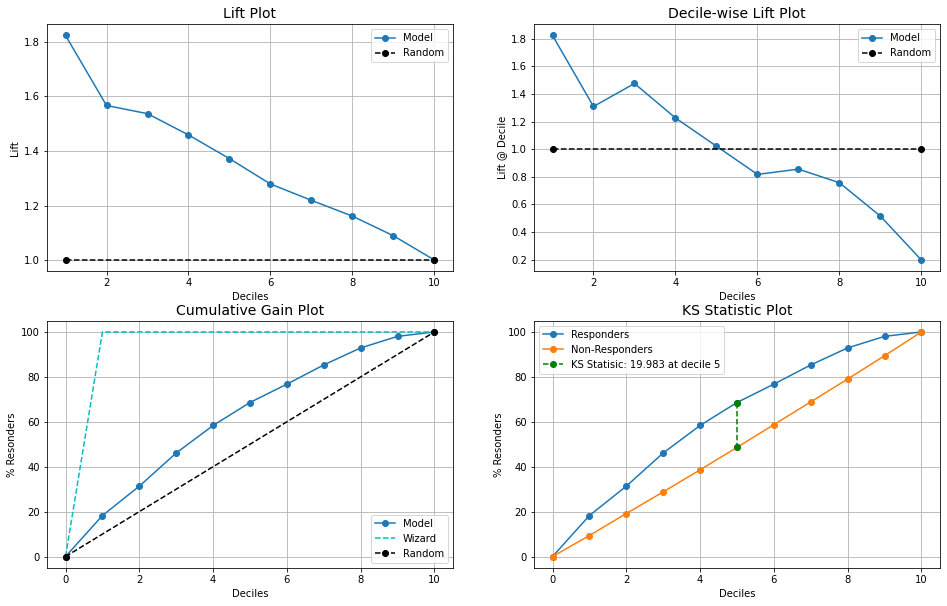

In [27]:
y_prob = clf.predict_proba(X_test)[:,1]
kds.metrics.report(Y_test, y_prob)

In [29]:
df = data.copy()
df = df.merge(df_city[['customer_city','city_rank']], how='left', on = 'customer_city')
df = df.merge(df_state[['customer_state','state_rank']], how='left', on = 'customer_state')
df.drop(['click_date','Unnamed: 0'], axis=1, inplace=True)
#df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df=pd.get_dummies(df, columns=["platform","fav_genre",'customer_state','customer_city'])
X = df.drop(['subscriber'], axis=1)
Y = df['subscriber'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Predicted 1's 10536
Predicted 0's 8303
F1 score: 0.16344775238255885
roc_auc: 0.6368123661968885
confusion matrix: [[7951 9567]
 [ 352  969]]
              precision    recall  f1-score   support

           0       0.96      0.45      0.62     17518
           1       0.09      0.73      0.16      1321

    accuracy                           0.47     18839
   macro avg       0.52      0.59      0.39     18839
weighted avg       0.90      0.47      0.58     18839

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible respo

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.625,0.940,0.672,1884.0,240.0,1644.0,132.1,1321,12.739,1884.0,240.0,1321,1644.0,10.001,18.168,100.0,9.385,8.783,1.817
1,2,0.582,0.625,0.598,1884.0,173.0,1711.0,132.1,0,9.183,3768.0,413.0,1321,3355.0,20.001,31.264,100.0,19.152,12.112,1.563
2,3,0.564,0.582,0.572,1884.0,196.0,1688.0,132.1,0,10.403,5652.0,609.0,1321,5043.0,30.002,46.101,100.0,28.788,17.313,1.537
3,4,0.539,0.564,0.552,1884.0,160.0,1724.0,132.1,0,8.493,7536.0,769.0,1321,6767.0,40.002,58.213,100.0,38.629,19.584,1.455
4,5,0.509,0.539,0.523,1884.0,138.0,1746.0,132.1,0,7.325,9420.0,907.0,1321,8513.0,50.003,68.660,100.0,48.596,20.064,1.373
5,6,0.486,0.509,0.500,1884.0,106.0,1778.0,132.1,0,5.626,11304.0,1013.0,1321,10291.0,60.003,76.684,100.0,58.745,17.939,1.278
6,7,0.434,0.486,0.468,1884.0,116.0,1768.0,132.1,0,6.157,13188.0,1129.0,1321,12059.0,70.004,85.466,100.0,68.838,16.628,1.221
7,8,0.369,0.434,0.405,1884.0,98.0,1786.0,132.1,0,5.202,15072.0,1227.0,1321,13845.0,80.004,92.884,100.0,79.033,13.851,1.161
8,9,0.211,0.369,0.296,1884.0,70.0,1814.0,132.1,0,3.715,16956.0,1297.0,1321,15659.0,90.005,98.183,100.0,89.388,8.795,1.091
9,10,0.064,0.211,0.176,1883.0,24.0,1859.0,132.1,0,1.275,18839.0,1321.0,1321,17518.0,100.000,100.000,100.0,100.000,0.000,1.000


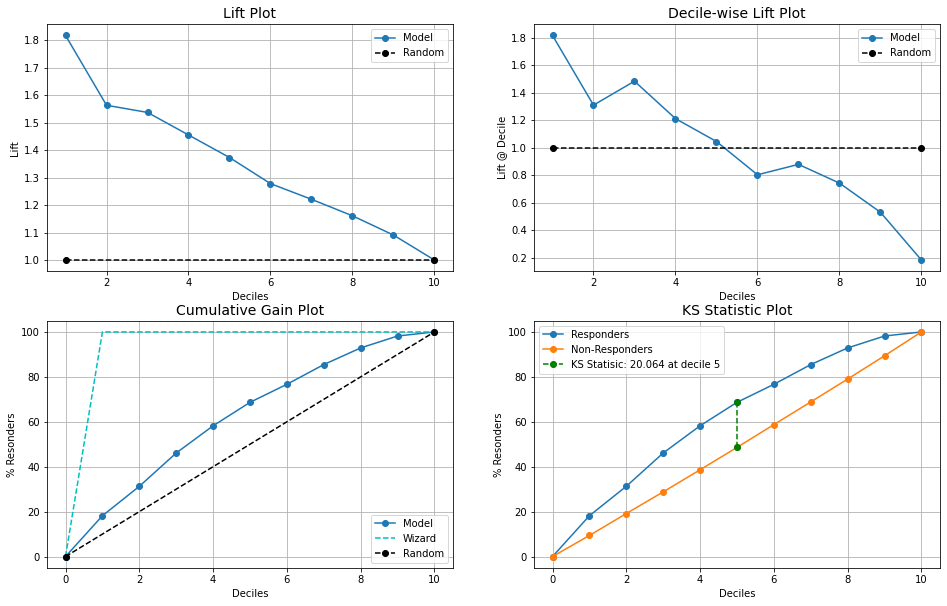

In [30]:
weights = {0: 0.07, 1: 0.93}
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
y_prob = clf.predict_proba(X_test)[:,1]
kds.metrics.report(Y_test, y_prob)

In [31]:
df = data.copy()
#df = df.merge(df_city[['customer_city','city_rank']], how='left', on = 'customer_city')
#df = df.merge(df_state[['customer_state','state_rank']], how='left', on = 'customer_state')
df.drop(['click_date','Unnamed: 0'], axis=1, inplace=True)
#df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df=pd.get_dummies(df, columns=["platform","fav_genre",'customer_state','customer_city'])
X = df.drop(['subscriber'], axis=1)
Y = df['subscriber'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Predicted 1's 10206
Predicted 0's 8633
F1 score: 0.16101327318469683
roc_auc: 0.6243892839453378
confusion matrix: [[8240 9278]
 [ 393  928]]
              precision    recall  f1-score   support

           0       0.95      0.47      0.63     17518
           1       0.09      0.70      0.16      1321

    accuracy                           0.49     18839
   macro avg       0.52      0.59      0.40     18839
weighted avg       0.89      0.49      0.60     18839

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible respo

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.612,0.865,0.653,1884.0,225.0,1659.0,132.1,1321,11.943,1884.0,225.0,1321,1659.0,10.001,17.033,100.0,9.470,7.563,1.703
1,2,0.577,0.612,0.591,1884.0,188.0,1696.0,132.1,0,9.979,3768.0,413.0,1321,3355.0,20.001,31.264,100.0,19.152,12.112,1.563
2,3,0.564,0.577,0.570,1884.0,175.0,1709.0,132.1,0,9.289,5652.0,588.0,1321,5064.0,30.002,44.512,100.0,28.907,15.605,1.484
3,4,0.538,0.564,0.550,1884.0,169.0,1715.0,132.1,0,8.970,7536.0,757.0,1321,6779.0,40.002,57.305,100.0,38.697,18.608,1.433
4,5,0.509,0.538,0.522,1884.0,132.0,1752.0,132.1,0,7.006,9420.0,889.0,1321,8531.0,50.003,67.298,100.0,48.698,18.600,1.346
5,6,0.489,0.509,0.500,1884.0,99.0,1785.0,132.1,0,5.255,11304.0,988.0,1321,10316.0,60.003,74.792,100.0,58.888,15.904,1.246
6,7,0.442,0.488,0.471,1884.0,122.0,1762.0,132.1,0,6.476,13188.0,1110.0,1321,12078.0,70.004,84.027,100.0,68.946,15.081,1.200
7,8,0.401,0.442,0.419,1884.0,99.0,1785.0,132.1,0,5.255,15072.0,1209.0,1321,13863.0,80.004,91.522,100.0,79.136,12.386,1.144
8,9,0.273,0.401,0.346,1884.0,85.0,1799.0,132.1,0,4.512,16956.0,1294.0,1321,15662.0,90.005,97.956,100.0,89.405,8.551,1.088
9,10,0.108,0.273,0.194,1883.0,27.0,1856.0,132.1,0,1.434,18839.0,1321.0,1321,17518.0,100.000,100.000,100.0,100.000,0.000,1.000


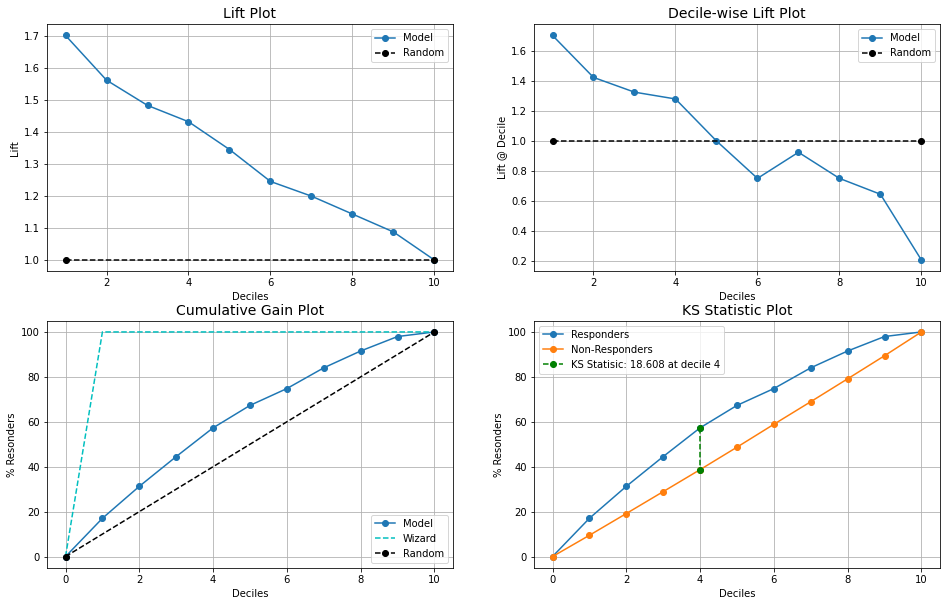

In [32]:
weights = {0: 0.07, 1: 0.93}
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
y_prob = clf.predict_proba(X_test)[:,1]
kds.metrics.report(Y_test, y_prob)

In [33]:
df = data.copy()
df = df.merge(df_city[['customer_city','city_rank']], how='left', on = 'customer_city')
#df = df.merge(df_state[['customer_state','state_rank']], how='left', on = 'customer_state')
df.drop(['click_date','Unnamed: 0'], axis=1, inplace=True)
df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df=pd.get_dummies(df, columns=["platform","fav_genre",'customer_state','customer_city'])
X = df.drop(['subscriber'], axis=1)
Y = df['subscriber'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Predicted 1's 10535
Predicted 0's 8304
F1 score: 0.16346153846153846
roc_auc: 0.6368816795684318
confusion matrix: [[7952 9566]
 [ 352  969]]
              precision    recall  f1-score   support

           0       0.96      0.45      0.62     17518
           1       0.09      0.73      0.16      1321

    accuracy                           0.47     18839
   macro avg       0.52      0.59      0.39     18839
weighted avg       0.90      0.47      0.58     18839

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible respo

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.625,0.939,0.672,1884.0,240.0,1644.0,132.1,1321,12.739,1884.0,240.0,1321,1644.0,10.001,18.168,100.0,9.385,8.783,1.817
1,2,0.582,0.625,0.598,1884.0,174.0,1710.0,132.1,0,9.236,3768.0,414.0,1321,3354.0,20.001,31.340,100.0,19.146,12.194,1.567
2,3,0.564,0.582,0.572,1884.0,195.0,1689.0,132.1,0,10.350,5652.0,609.0,1321,5043.0,30.002,46.101,100.0,28.788,17.313,1.537
3,4,0.539,0.564,0.552,1884.0,160.0,1724.0,132.1,0,8.493,7536.0,769.0,1321,6767.0,40.002,58.213,100.0,38.629,19.584,1.455
4,5,0.509,0.539,0.523,1884.0,137.0,1747.0,132.1,0,7.272,9420.0,906.0,1321,8514.0,50.003,68.584,100.0,48.601,19.983,1.372
5,6,0.486,0.509,0.500,1884.0,108.0,1776.0,132.1,0,5.732,11304.0,1014.0,1321,10290.0,60.003,76.760,100.0,58.740,18.020,1.279
6,7,0.435,0.486,0.468,1884.0,114.0,1770.0,132.1,0,6.051,13188.0,1128.0,1321,12060.0,70.004,85.390,100.0,68.843,16.547,1.220
7,8,0.370,0.435,0.405,1884.0,101.0,1783.0,132.1,0,5.361,15072.0,1229.0,1321,13843.0,80.004,93.036,100.0,79.022,14.014,1.163
8,9,0.211,0.370,0.296,1884.0,70.0,1814.0,132.1,0,3.715,16956.0,1299.0,1321,15657.0,90.005,98.335,100.0,89.377,8.958,1.093
9,10,0.063,0.211,0.176,1883.0,22.0,1861.0,132.1,0,1.168,18839.0,1321.0,1321,17518.0,100.000,100.000,100.0,100.000,0.000,1.000


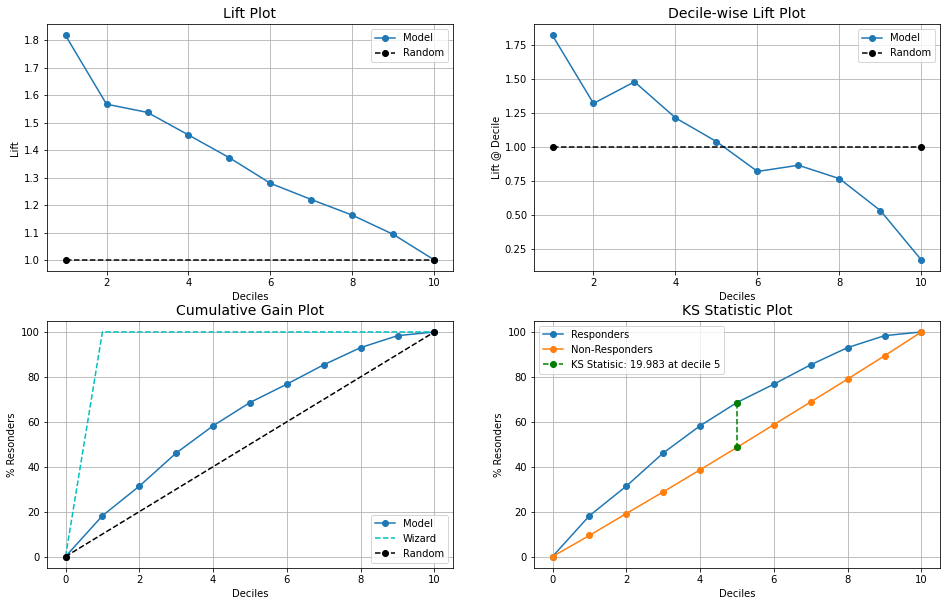

In [34]:
weights = {0: 0.07, 1: 0.93}
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
y_prob = clf.predict_proba(X_test)[:,1]
kds.metrics.report(Y_test, y_prob)

In [35]:
df = data.copy()
df = df.merge(df_city[['customer_city','city_rank']], how='left', on = 'customer_city')
df = df.merge(df_state[['customer_state','state_rank']], how='left', on = 'customer_state')
df.drop(['click_date','Unnamed: 0'], axis=1, inplace=True)
#df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df=pd.get_dummies(df, columns=["platform","fav_genre"])
X = df.drop(['subscriber','customer_state','customer_city'], axis=1)
Y = df['subscriber'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Predicted 1's 8300
Predicted 0's 10539
F1 score: 0.1712919654921526
roc_auc: 0.6443371018661976
confusion matrix: [[10042  7476]
 [  497   824]]
              precision    recall  f1-score   support

           0       0.95      0.57      0.72     17518
           1       0.10      0.62      0.17      1321

    accuracy                           0.58     18839
   macro avg       0.53      0.60      0.44     18839
weighted avg       0.89      0.58      0.68     18839

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible re

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.620,0.906,0.674,1884.0,260.0,1624.0,132.1,1321,13.800,1884.0,260.0,1321,1624.0,10.001,19.682,100.0,9.270,10.412,1.968
1,2,0.596,0.620,0.606,1884.0,188.0,1696.0,132.1,0,9.979,3768.0,448.0,1321,3320.0,20.001,33.914,100.0,18.952,14.962,1.696
2,3,0.562,0.596,0.587,1884.0,174.0,1710.0,132.1,0,9.236,5652.0,622.0,1321,5030.0,30.002,47.086,100.0,28.713,18.373,1.569
3,4,0.548,0.562,0.561,1884.0,137.0,1747.0,132.1,0,7.272,7536.0,759.0,1321,6777.0,40.002,57.456,100.0,38.686,18.770,1.436
4,5,0.486,0.548,0.501,1884.0,153.0,1731.0,132.1,0,8.121,9420.0,912.0,1321,8508.0,50.003,69.039,100.0,48.567,20.472,1.381
5,6,0.471,0.486,0.478,1884.0,125.0,1759.0,132.1,0,6.635,11304.0,1037.0,1321,10267.0,60.003,78.501,100.0,58.608,19.893,1.308
6,7,0.442,0.471,0.451,1884.0,103.0,1781.0,132.1,0,5.467,13188.0,1140.0,1321,12048.0,70.004,86.298,100.0,68.775,17.523,1.233
7,8,0.329,0.442,0.393,1884.0,88.0,1796.0,132.1,0,4.671,15072.0,1228.0,1321,13844.0,80.004,92.960,100.0,79.027,13.933,1.162
8,9,0.288,0.329,0.309,1884.0,62.0,1822.0,132.1,0,3.291,16956.0,1290.0,1321,15666.0,90.005,97.653,100.0,89.428,8.225,1.085
9,10,0.145,0.288,0.256,1883.0,31.0,1852.0,132.1,0,1.646,18839.0,1321.0,1321,17518.0,100.000,100.000,100.0,100.000,0.000,1.000


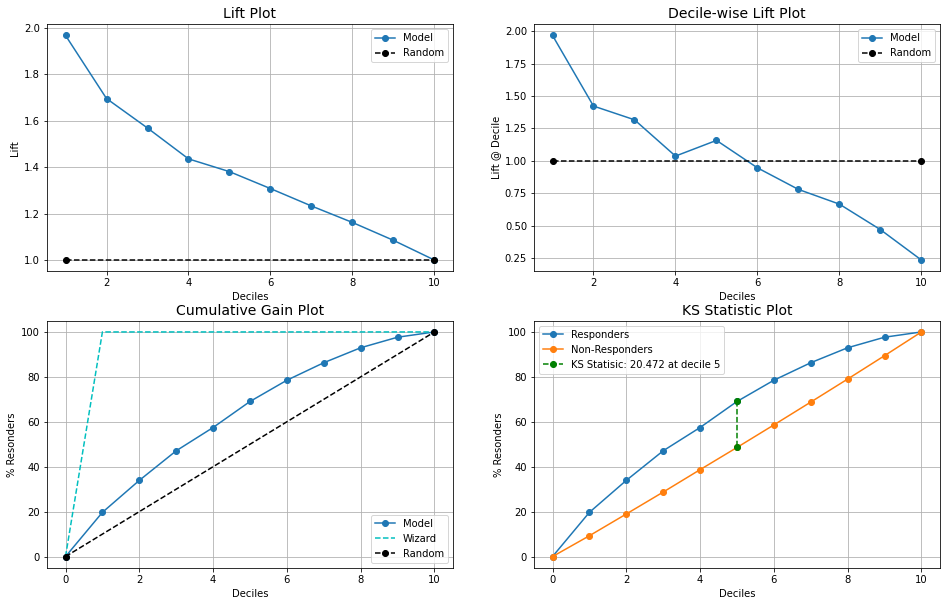

In [36]:
weights = {0: 0.07, 1: 0.93}
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
y_prob = clf.predict_proba(X_test)[:,1]
kds.metrics.report(Y_test, y_prob)

Predicted 1's 9430
Predicted 0's 9409
F1 score: 0.1705887824388429
roc_auc: 0.6440915665936859
confusion matrix: [[9005 8513]
 [ 404  917]]
              precision    recall  f1-score   support

           0       0.96      0.51      0.67     17518
           1       0.10      0.69      0.17      1321

    accuracy                           0.53     18839
   macro avg       0.53      0.60      0.42     18839
weighted avg       0.90      0.53      0.63     18839

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible respond

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.626,0.927,0.680,1884.0,243.0,1641.0,132.1,1321,12.898,1884.0,243.0,1321,1641.0,10.001,18.395,100.0,9.368,9.027,1.839
1,2,0.592,0.626,0.604,1884.0,204.0,1680.0,132.1,0,10.828,3768.0,447.0,1321,3321.0,20.001,33.838,100.0,18.958,14.880,1.692
2,3,0.564,0.592,0.577,1884.0,162.0,1722.0,132.1,0,8.599,5652.0,609.0,1321,5043.0,30.002,46.101,100.0,28.788,17.313,1.537
3,4,0.535,0.564,0.549,1884.0,168.0,1716.0,132.1,0,8.917,7536.0,777.0,1321,6759.0,40.002,58.819,100.0,38.583,20.236,1.470
4,5,0.500,0.535,0.515,1884.0,140.0,1744.0,132.1,0,7.431,9420.0,917.0,1321,8503.0,50.003,69.417,100.0,48.539,20.878,1.388
5,6,0.482,0.500,0.490,1884.0,117.0,1767.0,132.1,0,6.210,11304.0,1034.0,1321,10270.0,60.003,78.274,100.0,58.625,19.649,1.305
6,7,0.436,0.482,0.462,1884.0,99.0,1785.0,132.1,0,5.255,13188.0,1133.0,1321,12055.0,70.004,85.768,100.0,68.815,16.953,1.225
7,8,0.327,0.436,0.389,1884.0,102.0,1782.0,132.1,0,5.414,15072.0,1235.0,1321,13837.0,80.004,93.490,100.0,78.987,14.503,1.169
8,9,0.280,0.327,0.304,1884.0,57.0,1827.0,132.1,0,3.025,16956.0,1292.0,1321,15664.0,90.005,97.805,100.0,89.417,8.388,1.087
9,10,0.138,0.280,0.231,1883.0,29.0,1854.0,132.1,0,1.540,18839.0,1321.0,1321,17518.0,100.000,100.000,100.0,100.000,0.000,1.000


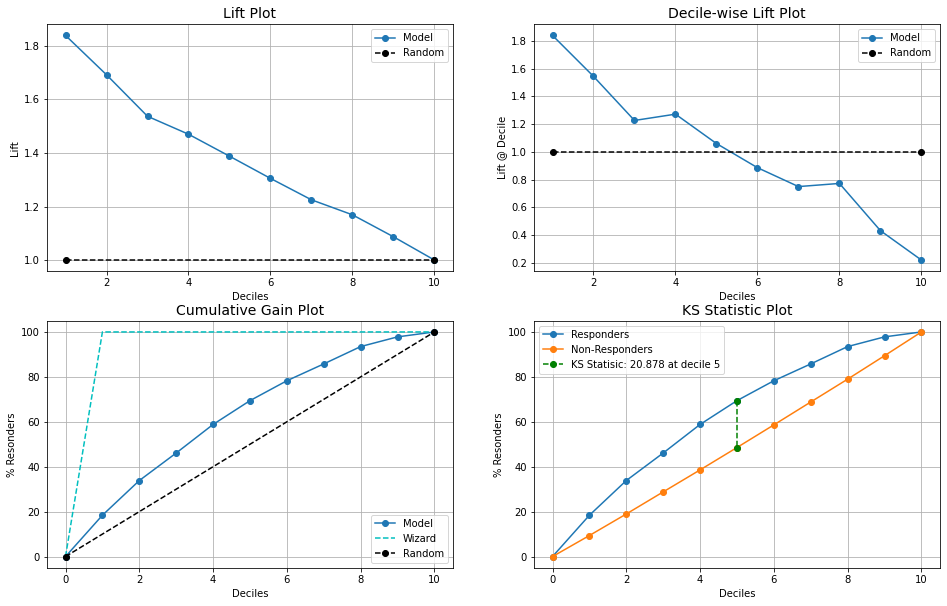

In [37]:
df = data.copy()
df = df.merge(df_city[['customer_city','city_rank']], how='left', on = 'customer_city')
df = df.merge(df_state[['customer_state','state_rank']], how='left', on = 'customer_state')
df.drop(['click_date','Unnamed: 0'], axis=1, inplace=True)
#df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df=pd.get_dummies(df, columns=["platform","fav_genre",'customer_state'])
X = df.drop(['subscriber','customer_city'], axis=1)
Y = df['subscriber'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

weights = {0: 0.07, 1: 0.93}
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
y_prob = clf.predict_proba(X_test)[:,1]
kds.metrics.report(Y_test, y_prob)


Predicted 1's 10536
Predicted 0's 8303
F1 score: 0.16344775238255885
roc_auc: 0.6368123661968885
confusion matrix: [[7951 9567]
 [ 352  969]]
              precision    recall  f1-score   support

           0       0.96      0.45      0.62     17518
           1       0.09      0.73      0.16      1321

    accuracy                           0.47     18839
   macro avg       0.52      0.59      0.39     18839
weighted avg       0.90      0.47      0.58     18839

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible respo

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.625,0.940,0.672,1884.0,240.0,1644.0,132.1,1321,12.739,1884.0,240.0,1321,1644.0,10.001,18.168,100.0,9.385,8.783,1.817
1,2,0.582,0.625,0.598,1884.0,173.0,1711.0,132.1,0,9.183,3768.0,413.0,1321,3355.0,20.001,31.264,100.0,19.152,12.112,1.563
2,3,0.564,0.582,0.572,1884.0,196.0,1688.0,132.1,0,10.403,5652.0,609.0,1321,5043.0,30.002,46.101,100.0,28.788,17.313,1.537
3,4,0.539,0.564,0.552,1884.0,160.0,1724.0,132.1,0,8.493,7536.0,769.0,1321,6767.0,40.002,58.213,100.0,38.629,19.584,1.455
4,5,0.509,0.539,0.523,1884.0,138.0,1746.0,132.1,0,7.325,9420.0,907.0,1321,8513.0,50.003,68.660,100.0,48.596,20.064,1.373
5,6,0.486,0.509,0.500,1884.0,106.0,1778.0,132.1,0,5.626,11304.0,1013.0,1321,10291.0,60.003,76.684,100.0,58.745,17.939,1.278
6,7,0.434,0.486,0.468,1884.0,116.0,1768.0,132.1,0,6.157,13188.0,1129.0,1321,12059.0,70.004,85.466,100.0,68.838,16.628,1.221
7,8,0.369,0.434,0.405,1884.0,98.0,1786.0,132.1,0,5.202,15072.0,1227.0,1321,13845.0,80.004,92.884,100.0,79.033,13.851,1.161
8,9,0.211,0.369,0.296,1884.0,70.0,1814.0,132.1,0,3.715,16956.0,1297.0,1321,15659.0,90.005,98.183,100.0,89.388,8.795,1.091
9,10,0.064,0.211,0.176,1883.0,24.0,1859.0,132.1,0,1.275,18839.0,1321.0,1321,17518.0,100.000,100.000,100.0,100.000,0.000,1.000


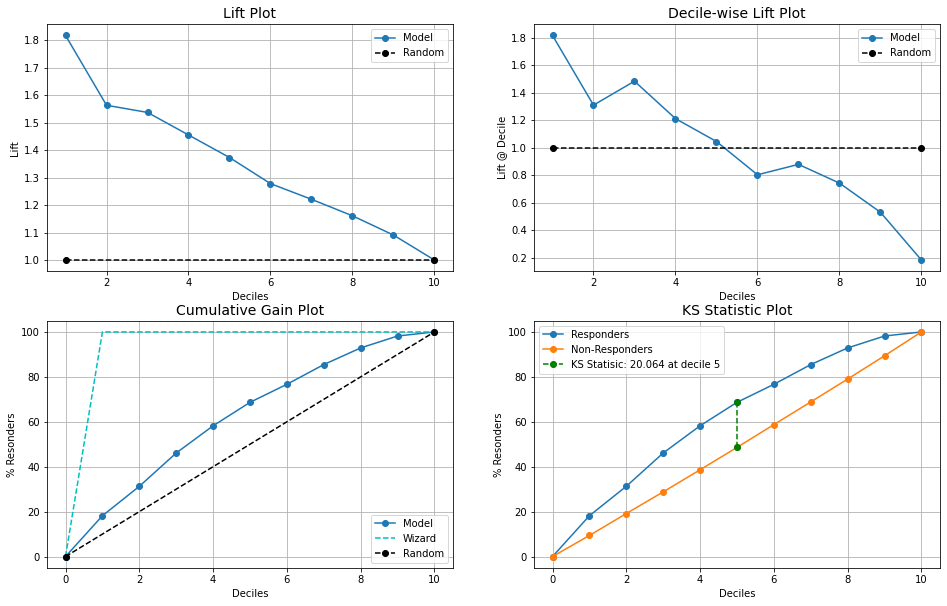

In [38]:
df = data.copy()
df = df.merge(df_city[['customer_city','city_rank']], how='left', on = 'customer_city')
df = df.merge(df_state[['customer_state','state_rank']], how='left', on = 'customer_state')
df.drop(['click_date','Unnamed: 0'], axis=1, inplace=True)
#df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df=pd.get_dummies(df, columns=["platform","fav_genre",'customer_state','customer_city'])
X = df.drop(['subscriber'], axis=1)
Y = df['subscriber'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

weights = {0: 0.07, 1: 0.93}
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
y_prob = clf.predict_proba(X_test)[:,1]
kds.metrics.report(Y_test, y_prob)


Predicted 1's 9427
Predicted 0's 9412
F1 score: 0.1706363974692966
roc_auc: 0.6441796343313451
confusion matrix: [[9008 8510]
 [ 404  917]]
              precision    recall  f1-score   support

           0       0.96      0.51      0.67     17518
           1       0.10      0.69      0.17      1321

    accuracy                           0.53     18839
   macro avg       0.53      0.60      0.42     18839
weighted avg       0.90      0.53      0.63     18839

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible respond

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.626,0.927,0.680,1884.0,243.0,1641.0,132.1,1321,12.898,1884.0,243.0,1321,1641.0,10.001,18.395,100.0,9.368,9.027,1.839
1,2,0.592,0.626,0.604,1884.0,204.0,1680.0,132.1,0,10.828,3768.0,447.0,1321,3321.0,20.001,33.838,100.0,18.958,14.880,1.692
2,3,0.564,0.592,0.577,1884.0,164.0,1720.0,132.1,0,8.705,5652.0,611.0,1321,5041.0,30.002,46.253,100.0,28.776,17.477,1.542
3,4,0.535,0.564,0.549,1884.0,168.0,1716.0,132.1,0,8.917,7536.0,779.0,1321,6757.0,40.002,58.970,100.0,38.572,20.398,1.474
4,5,0.500,0.535,0.515,1884.0,138.0,1746.0,132.1,0,7.325,9420.0,917.0,1321,8503.0,50.003,69.417,100.0,48.539,20.878,1.388
5,6,0.482,0.500,0.490,1884.0,117.0,1767.0,132.1,0,6.210,11304.0,1034.0,1321,10270.0,60.003,78.274,100.0,58.625,19.649,1.305
6,7,0.436,0.482,0.462,1884.0,97.0,1787.0,132.1,0,5.149,13188.0,1131.0,1321,12057.0,70.004,85.617,100.0,68.826,16.791,1.223
7,8,0.327,0.436,0.389,1884.0,104.0,1780.0,132.1,0,5.520,15072.0,1235.0,1321,13837.0,80.004,93.490,100.0,78.987,14.503,1.169
8,9,0.280,0.327,0.304,1884.0,54.0,1830.0,132.1,0,2.866,16956.0,1289.0,1321,15667.0,90.005,97.578,100.0,89.434,8.144,1.084
9,10,0.137,0.280,0.231,1883.0,32.0,1851.0,132.1,0,1.699,18839.0,1321.0,1321,17518.0,100.000,100.000,100.0,100.000,0.000,1.000


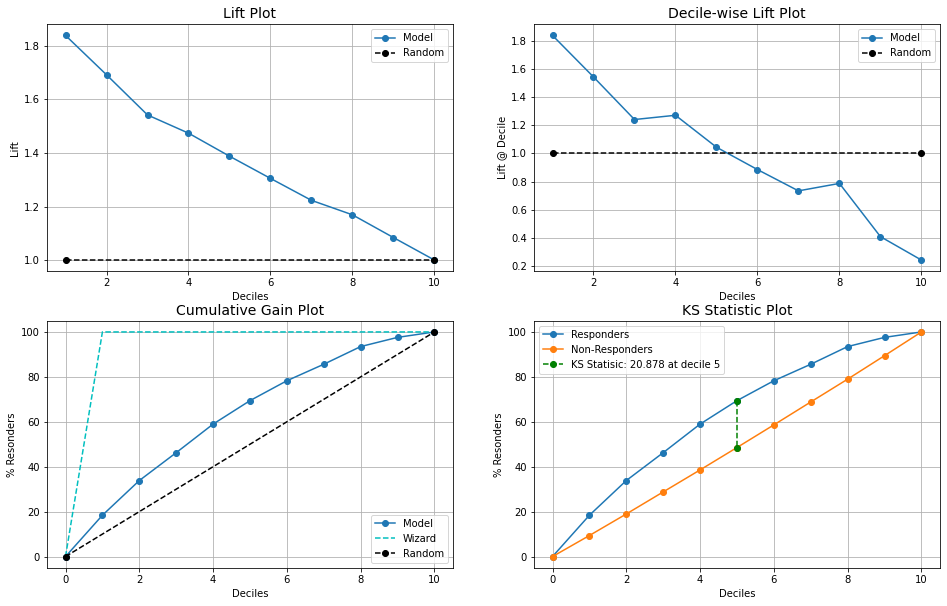

In [39]:
df = data.copy()
df = df.merge(df_city[['customer_city','city_rank']], how='left', on = 'customer_city')
#df = df.merge(df_state[['customer_state','state_rank']], how='left', on = 'customer_state')
df.drop(['click_date','Unnamed: 0'], axis=1, inplace=True)
#df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df=pd.get_dummies(df, columns=["platform","fav_genre",'customer_state'])
X = df.drop(['subscriber','customer_city'], axis=1)
Y = df['subscriber'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

weights = {0: 0.07, 1: 0.93}
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
y_prob = clf.predict_proba(X_test)[:,1]
kds.metrics.report(Y_test, y_prob)


In [58]:
data.head()

,Unnamed: 0,click_date,platform,customer_city,customer_state,urban_flag,credit_card_on_file,student,fav_genre,subscriber
0,0,2017-12-27,mobile web,san antonio,Texas,1,0,0,hip_hop,True
1,1,2018-01-10,mobile web,honolulu,Hawaii,0,0,0,hip_hop,False
2,2,2017-12-15,desktop web,atlanta,Georgia,1,0,0,hip_hop,True
3,3,2018-01-06,mobile web,honolulu,Hawaii,0,0,0,hip_hop,False
4,4,2017-12-20,mobile web,miami,Florida,0,0,0,indie_rock,False


In [2]:
df = data.copy()
df = df.merge(df_city[['customer_city','city_rank']], how='left', on = 'customer_city')
#df = df.merge(df_state[['customer_state','state_rank']], how='left', on = 'customer_state')
df.drop(['click_date','Unnamed: 0',], axis=1, inplace=True)
#df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df['fav_genre_top3'] = np.where(df.fav_genre.isin(['hip_hop','not_defined', 'techno']), 1,0)

df=pd.get_dummies(df, columns=["platform",'customer_state'])
df.drop(['platform_mobile web', 'platform_undefined platform','fav_genre'],axis=1,inplace=True)

NameError: ignored

In [60]:
df.columns

Index(['customer_city', 'urban_flag', 'credit_card_on_file', 'student',
       'subscriber', 'city_rank', 'fav_genre_top3', 'platform_desktop web',
       'customer_state_Alabama', 'customer_state_Alaska',
       'customer_state_Arizona', 'customer_state_Arkansas',
       'customer_state_California', 'customer_state_Colorado',
       'customer_state_Connecticut', 'customer_state_Delaware',
       'customer_state_Distict of Columbia', 'customer_state_Florida',
       'customer_state_Georgia', 'customer_state_Hawaii',
       'customer_state_Idaho', 'customer_state_Illinois',
       'customer_state_Indiana', 'customer_state_Iowa',
       'customer_state_Kansas', 'customer_state_Kentucky',
       'customer_state_Louisiana', 'customer_state_Maine',
       'customer_state_Maryland', 'customer_state_Massachusetts',
       'customer_state_Michigan', 'customer_state_Minnesota',
       'customer_state_Mississippi', 'customer_state_Missouri',
       'customer_state_Montana', 'customer_state_Nebra

Predicted 1's 9556
Predicted 0's 9283
F1 score: 0.17100303392479543
roc_auc: 0.6437144914814126
confusion matrix: [[8892 8626]
 [ 391  930]]
              precision    recall  f1-score   support

           0       0.96      0.51      0.66     17518
           1       0.10      0.70      0.17      1321

    accuracy                           0.52     18839
   macro avg       0.53      0.61      0.42     18839
weighted avg       0.90      0.52      0.63     18839

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible respon

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.616,0.927,0.679,1884.0,240.0,1644.0,132.1,1321,12.739,1884.0,240.0,1321,1644.0,10.001,18.168,100.0,9.385,8.783,1.817
1,2,0.595,0.616,0.602,1884.0,189.0,1695.0,132.1,0,10.032,3768.0,429.0,1321,3339.0,20.001,32.475,100.0,19.060,13.415,1.624
2,3,0.564,0.595,0.578,1884.0,194.0,1690.0,132.1,0,10.297,5652.0,623.0,1321,5029.0,30.002,47.161,100.0,28.708,18.453,1.572
3,4,0.531,0.564,0.548,1884.0,156.0,1728.0,132.1,0,8.280,7536.0,779.0,1321,6757.0,40.002,58.970,100.0,38.572,20.398,1.474
4,5,0.501,0.531,0.517,1884.0,142.0,1742.0,132.1,0,7.537,9420.0,921.0,1321,8499.0,50.003,69.720,100.0,48.516,21.204,1.394
5,6,0.479,0.501,0.489,1884.0,111.0,1773.0,132.1,0,5.892,11304.0,1032.0,1321,10272.0,60.003,78.123,100.0,58.637,19.486,1.302
6,7,0.440,0.479,0.462,1884.0,99.0,1785.0,132.1,0,5.255,13188.0,1131.0,1321,12057.0,70.004,85.617,100.0,68.826,16.791,1.223
7,8,0.341,0.440,0.391,1884.0,105.0,1779.0,132.1,0,5.573,15072.0,1236.0,1321,13836.0,80.004,93.565,100.0,78.982,14.583,1.170
8,9,0.260,0.341,0.307,1884.0,52.0,1832.0,132.1,0,2.760,16956.0,1288.0,1321,15668.0,90.005,97.502,100.0,89.439,8.063,1.083
9,10,0.137,0.260,0.230,1883.0,33.0,1850.0,132.1,0,1.753,18839.0,1321.0,1321,17518.0,100.000,100.000,100.0,100.000,0.000,1.000


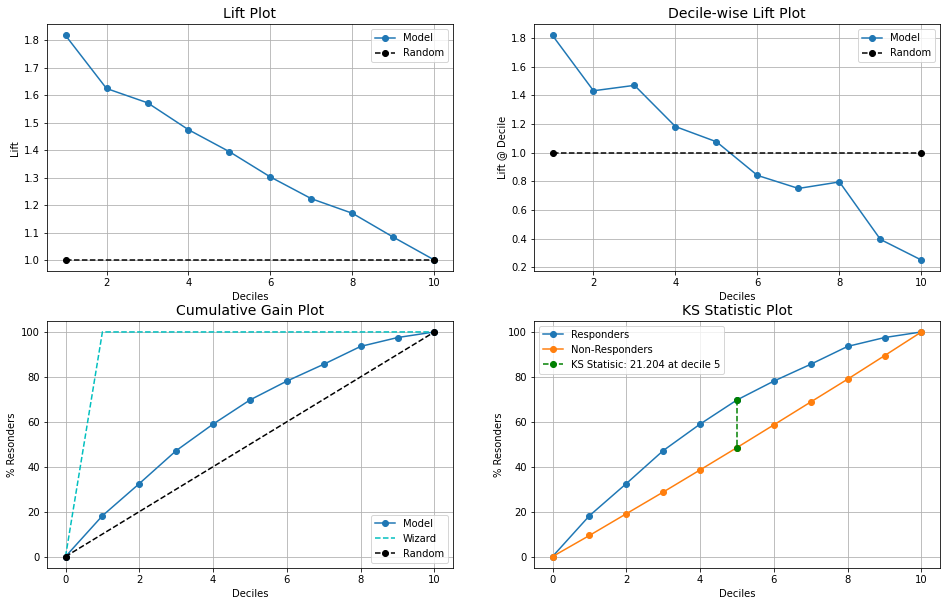

In [61]:

X = df.drop(['subscriber','customer_city'], axis=1)
Y = df['subscriber'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

weights = {0: 0.07, 1: 0.93}
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
y_prob = clf.predict_proba(X_test)[:,1]
kds.metrics.report(Y_test, y_prob)


Predicted 1's 9556
Predicted 0's 9283
F1 score: 0.17100303392479543
roc_auc: 0.6436954562319332
confusion matrix: [[8892 8626]
 [ 391  930]]
              precision    recall  f1-score   support

           0       0.96      0.51      0.66     17518
           1       0.10      0.70      0.17      1321

    accuracy                           0.52     18839
   macro avg       0.53      0.61      0.42     18839
weighted avg       0.90      0.52      0.63     18839

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible respon

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.617,0.927,0.679,1884.0,240.0,1644.0,132.1,1321,12.739,1884.0,240.0,1321,1644.0,10.001,18.168,100.0,9.385,8.783,1.817
1,2,0.595,0.617,0.602,1884.0,189.0,1695.0,132.1,0,10.032,3768.0,429.0,1321,3339.0,20.001,32.475,100.0,19.060,13.415,1.624
2,3,0.564,0.595,0.578,1884.0,197.0,1687.0,132.1,0,10.456,5652.0,626.0,1321,5026.0,30.002,47.388,100.0,28.690,18.698,1.579
3,4,0.532,0.564,0.548,1884.0,156.0,1728.0,132.1,0,8.280,7536.0,782.0,1321,6754.0,40.002,59.198,100.0,38.555,20.643,1.480
4,5,0.501,0.532,0.517,1884.0,139.0,1745.0,132.1,0,7.378,9420.0,921.0,1321,8499.0,50.003,69.720,100.0,48.516,21.204,1.394
5,6,0.479,0.501,0.489,1884.0,111.0,1773.0,132.1,0,5.892,11304.0,1032.0,1321,10272.0,60.003,78.123,100.0,58.637,19.486,1.302
6,7,0.440,0.479,0.462,1884.0,105.0,1779.0,132.1,0,5.573,13188.0,1137.0,1321,12051.0,70.004,86.071,100.0,68.792,17.279,1.230
7,8,0.341,0.440,0.391,1884.0,97.0,1787.0,132.1,0,5.149,15072.0,1234.0,1321,13838.0,80.004,93.414,100.0,78.993,14.421,1.168
8,9,0.260,0.341,0.307,1884.0,55.0,1829.0,132.1,0,2.919,16956.0,1289.0,1321,15667.0,90.005,97.578,100.0,89.434,8.144,1.084
9,10,0.137,0.260,0.230,1883.0,32.0,1851.0,132.1,0,1.699,18839.0,1321.0,1321,17518.0,100.000,100.000,100.0,100.000,0.000,1.000


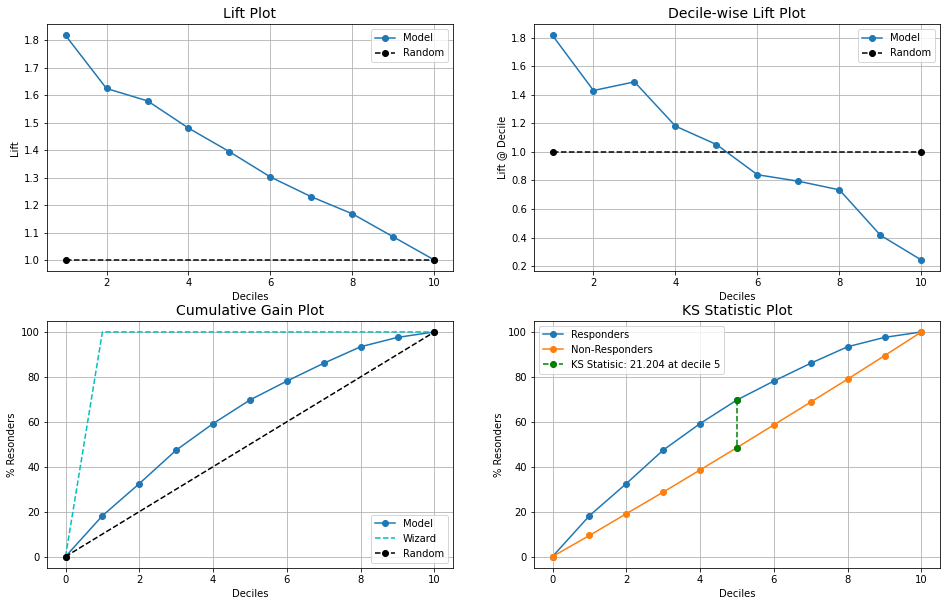

In [24]:
# dropping high corr student flag
df = data.copy()
df = df.merge(df_city[['customer_city','city_rank']], how='left', on = 'customer_city')
#df = df.merge(df_state[['customer_state','state_rank']], how='left', on = 'customer_state')
df.drop(['click_date','Unnamed: 0',], axis=1, inplace=True)
#df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df['fav_genre_top3'] = np.where(df.fav_genre.isin(['hip_hop','not_defined', 'techno']), 1,0)
df=pd.get_dummies(df, columns=["platform",'customer_state'])
df.drop(['platform_mobile web', 'platform_undefined platform','fav_genre'],axis=1,inplace=True)
X = df.drop(['subscriber','customer_city','student'], axis=1)
Y = df['subscriber'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

weights = {0: 0.07, 1: 0.93}
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
y_prob = clf.predict_proba(X_test)[:,1]
kds.metrics.report(Y_test, y_prob)


Predicted 1's 9333
Predicted 0's 9506
F1 score: 0.17232964144922094
roc_auc: 0.6406604466702314
confusion matrix: [[9103 8415]
 [ 403  918]]
              precision    recall  f1-score   support

           0       0.96      0.52      0.67     17518
           1       0.10      0.69      0.17      1321

    accuracy                           0.53     18839
   macro avg       0.53      0.61      0.42     18839
weighted avg       0.90      0.53      0.64     18839

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible respon

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.615,0.928,0.674,1884.0,243.0,1641.0,132.1,1321,12.898,1884.0,243.0,1321,1641.0,10.001,18.395,100.0,9.368,9.027,1.839
1,2,0.597,0.615,0.603,1884.0,183.0,1701.0,132.1,0,9.713,3768.0,426.0,1321,3342.0,20.001,32.248,100.0,19.078,13.170,1.612
2,3,0.567,0.597,0.576,1884.0,172.0,1712.0,132.1,0,9.130,5652.0,598.0,1321,5054.0,30.002,45.269,100.0,28.850,16.419,1.509
3,4,0.533,0.567,0.552,1884.0,174.0,1710.0,132.1,0,9.236,7536.0,772.0,1321,6764.0,40.002,58.441,100.0,38.612,19.829,1.461
4,5,0.498,0.533,0.515,1884.0,149.0,1735.0,132.1,0,7.909,9420.0,921.0,1321,8499.0,50.003,69.720,100.0,48.516,21.204,1.394
5,6,0.487,0.498,0.494,1884.0,106.0,1778.0,132.1,0,5.626,11304.0,1027.0,1321,10277.0,60.003,77.744,100.0,58.665,19.079,1.296
6,7,0.442,0.487,0.465,1884.0,105.0,1779.0,132.1,0,5.573,13188.0,1132.0,1321,12056.0,70.004,85.693,100.0,68.821,16.872,1.224
7,8,0.338,0.442,0.393,1884.0,100.0,1784.0,132.1,0,5.308,15072.0,1232.0,1321,13840.0,80.004,93.263,100.0,79.004,14.259,1.166
8,9,0.261,0.338,0.310,1884.0,57.0,1827.0,132.1,0,3.025,16956.0,1289.0,1321,15667.0,90.005,97.578,100.0,89.434,8.144,1.084
9,10,0.145,0.261,0.228,1883.0,32.0,1851.0,132.1,0,1.699,18839.0,1321.0,1321,17518.0,100.000,100.000,100.0,100.000,0.000,1.000


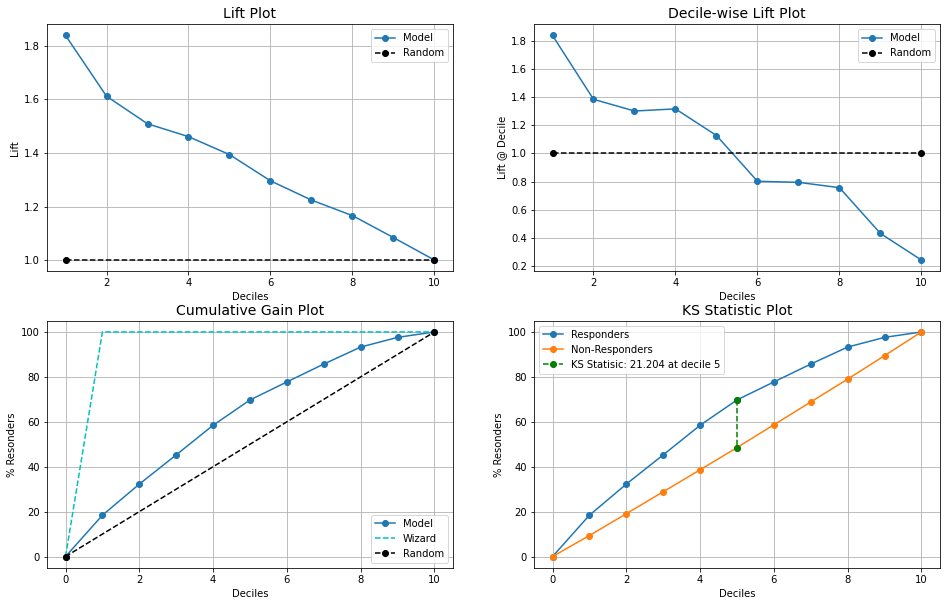

In [26]:
# dropping high corr urban flag ==> we can do this because it doesn't really impact the metrics
df = data.copy()
df = df.merge(df_city[['customer_city','city_rank']], how='left', on = 'customer_city')
#df = df.merge(df_state[['customer_state','state_rank']], how='left', on = 'customer_state')
df.drop(['click_date','Unnamed: 0',], axis=1, inplace=True)
#df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df['fav_genre_top3'] = np.where(df.fav_genre.isin(['hip_hop','not_defined', 'techno']), 1,0)
df=pd.get_dummies(df, columns=["platform",'customer_state'])
df.drop(['platform_mobile web', 'platform_undefined platform','fav_genre'],axis=1,inplace=True)
X = df.drop(['subscriber','customer_city','urban_flag'], axis=1)
Y = df['subscriber'].astype(int)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

weights = {0: 0.07, 1: 0.93}
clf = LogisticRegression(random_state=42,max_iter=1000, class_weight=weights)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
#Y_pred = (clf.predict_proba(X_test)[:,1] >= 0.45).astype(int)

print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
y_prob = clf.predict_proba(X_test)[:,1]
kds.metrics.report(Y_test, y_prob)


In [69]:
clf.coef_

array([[ 0.19907201,  0.7601991 ,  0.00169225,  0.50060276,  0.34463037,
         0.18822388,  0.35235705,  0.10521427,  0.23890711, -0.1008912 ,
         0.01739912,  0.09811026, -0.09457971,  0.09088172,  0.14900057,
         0.06918319,  0.06738863,  0.15572787, -0.35153769, -0.21438783,
        -0.17149734,  0.05740264,  0.06540961,  0.02519489, -0.06892754,
        -0.07097721, -0.12167222,  0.22821387,  0.00507249, -0.00963993,
        -0.19537764, -0.36401773, -0.14023961,  0.04106991, -0.18568188,
        -0.12474904, -0.06791251,  0.0263447 ,  0.25190098,  0.2143114 ,
        -0.00610874, -0.26770885, -0.00843875, -0.00441825,  0.2090136 ,
        -0.13977118,  0.10292229, -0.18207069,  0.19519132,  0.0085105 ]])

In [71]:
from matplotlib import pyplot

In [82]:
clf.coef_[0]

array([ 0.19907201,  0.7601991 ,  0.00169225,  0.50060276,  0.34463037,
        0.18822388,  0.35235705,  0.10521427,  0.23890711, -0.1008912 ,
        0.01739912,  0.09811026, -0.09457971,  0.09088172,  0.14900057,
        0.06918319,  0.06738863,  0.15572787, -0.35153769, -0.21438783,
       -0.17149734,  0.05740264,  0.06540961,  0.02519489, -0.06892754,
       -0.07097721, -0.12167222,  0.22821387,  0.00507249, -0.00963993,
       -0.19537764, -0.36401773, -0.14023961,  0.04106991, -0.18568188,
       -0.12474904, -0.06791251,  0.0263447 ,  0.25190098,  0.2143114 ,
       -0.00610874, -0.26770885, -0.00843875, -0.00441825,  0.2090136 ,
       -0.13977118,  0.10292229, -0.18207069,  0.19519132,  0.0085105 ])

In [100]:
# get importance
importance = clf.coef_[0]
# summarize feature importance
#for i,v in enumerate(importance):
	# print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
# from matplotlib.pyplot import figure
# figure(num=None, figsize=(58, 46), dpi=380, facecolor='w', edgecolor='k')
# pyplot.bar(X.columns, importance,width=0.8)
# pyplot.show()
# pd.DataFrame(importance)
feature_importance = pd.DataFrame(X.columns,importance)

In [103]:

feature_importance.reset_index(inplace=True)

In [106]:
cols = ['parameters','feature']
feature_importance.columns = cols

In [110]:
feature_importance[['feature','parameters']].sort_values('parameters')

,feature,parameters
31,customer_state_Missouri,-0.364018
18,customer_state_Idaho,-0.351538
41,customer_state_Rhode Island,-0.267709
19,customer_state_Illinois,-0.214388
30,customer_state_Mississippi,-0.195378
34,customer_state_Nevada,-0.185682
47,customer_state_Virginia,-0.182071
20,customer_state_Indiana,-0.171497
32,customer_state_Montana,-0.140240
45,customer_state_Unknown,-0.139771


In [ ]:
# trying XGboost

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model = XGBClassifier()
weights = [1,5,7,8,10]
param_grid = dict(scale_pos_weight=weights)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='roc_auc')
# execute the grid search
grid_result = grid.fit(X, Y)


# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.638318 using {'scale_pos_weight': 1}
0.638318 (0.010511) with: {'scale_pos_weight': 1}
0.638045 (0.010672) with: {'scale_pos_weight': 5}
0.637900 (0.010346) with: {'scale_pos_weight': 7}
0.638155 (0.010449) with: {'scale_pos_weight': 8}
0.637837 (0.010405) with: {'scale_pos_weight': 10}


In [ ]:
x_model = grid.best_estimator_
Y_pred = x_model.predict(X_test)
print(len(Y_pred[Y_pred==1]))
print(len(Y_pred[Y_pred==0]))

4926
13913


In [ ]:
print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, x_model.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 4926
Predicted 0's 13913
F1 score: 0.18632943813030253
roc_auc: 0.6577229010428898
confusion matrix: [[13174  4344]
 [  739   582]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84     17518
           1       0.12      0.44      0.19      1321

    accuracy                           0.73     18839
   macro avg       0.53      0.60      0.51     18839
weighted avg       0.89      0.73      0.79     18839



In [ ]:
#Latest XGboost execution with weights = 10 beats logistic on roc_auc but has poor recall of 0.44

In [ ]:
# Use XGboost on data that has produced best results with Logistic so far

In [62]:
df = data.copy()
df = df.merge(df_city[['customer_city','city_rank']], how='left', on = 'customer_city')
#df = df.merge(df_state[['customer_state','state_rank']], how='left', on = 'customer_state')
df.drop(['click_date','Unnamed: 0',], axis=1, inplace=True)
#df['state_flag'] = np.where(df.customer_state.isin(['Florida','California', 'Hawaii', 'Texas','Colorado','Nevada','Arizona','Georgia','Pennsylvania','New Jersey','Maryland']), 1,0)
df['fav_genre_top3'] = np.where(df.fav_genre.isin(['hip_hop','not_defined', 'techno']), 1,0)

df=pd.get_dummies(df, columns=["platform",'customer_state'])
df.drop(['platform_mobile web', 'platform_undefined platform','fav_genre'],axis=1,inplace=True)


from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model = XGBClassifier()
weights = [1,7,10]
param_grid = dict(scale_pos_weight=weights)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='recall')
# execute the grid search
grid_result = grid.fit(X, Y)


# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.416235 using {'scale_pos_weight': 10}
0.000786 (0.001124) with: {'scale_pos_weight': 1}
0.080299 (0.009818) with: {'scale_pos_weight': 7}
0.416235 (0.015146) with: {'scale_pos_weight': 10}


In [63]:
x_model = grid.best_estimator_
Y_pred = x_model.predict(X_test)
print(len(Y_pred[Y_pred==1]))
print(len(Y_pred[Y_pred==0]))

4909
13930


In [64]:
print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, x_model.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 4909
Predicted 0's 13930
F1 score: 0.18491171749598714
roc_auc: 0.6562435315802351
confusion matrix: [[13185  4333]
 [  745   576]]
              precision    recall  f1-score   support

           0       0.95      0.75      0.84     17518
           1       0.12      0.44      0.18      1321

    accuracy                           0.73     18839
   macro avg       0.53      0.59      0.51     18839
weighted avg       0.89      0.73      0.79     18839



In [65]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model = XGBClassifier()
weights = [10,12,14]
param_grid = dict(scale_pos_weight=weights)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='recall')
# execute the grid search
grid_result = grid.fit(X, Y)


# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.769606 using {'scale_pos_weight': 14}
0.416235 (0.015146) with: {'scale_pos_weight': 10}
0.623396 (0.037186) with: {'scale_pos_weight': 12}
0.769606 (0.018086) with: {'scale_pos_weight': 14}


In [66]:
x_model = grid.best_estimator_
Y_pred = x_model.predict(X_test)
print(len(Y_pred[Y_pred==1]))
print(len(Y_pred[Y_pred==0]))

11219
7620


In [67]:
print("Predicted 1's",len(Y_pred[Y_pred==1]))
print("Predicted 0's", len(Y_pred[Y_pred==0]))
print("F1 score:", f1_score(Y_test, Y_pred))
print("roc_auc:" , roc_auc_score(Y_test, x_model.predict_proba(X_test)[:, 1]))
print("confusion matrix:", confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

Predicted 1's 11219
Predicted 0's 7620
F1 score: 0.16618819776714513
roc_auc: 0.6558318862078403
confusion matrix: [[ 7341 10177]
 [  279  1042]]
              precision    recall  f1-score   support

           0       0.96      0.42      0.58     17518
           1       0.09      0.79      0.17      1321

    accuracy                           0.44     18839
   macro avg       0.53      0.60      0.38     18839
weighted avg       0.90      0.44      0.55     18839

